In [1]:
from gan import gan
import matplotlib.pyplot as plt

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
starwars = gan()
starwars.make_generator()
starwars.make_discriminator()
starwars.model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1568      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
__________

In [3]:
import pandas as pd
dfile = '../notebooks/subsampled.csv'
df = pd.read_csv(dfile, sep='\s+', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.657403,0.866211,-0.473460,0.276009,-0.314098,0.459010,-1.000000,-1.000000,0.310517,0.452829,...,-1.000000,0.106202,0.044778,0.399841,-0.532263,-0.531102,0.000303,0.262623,-0.295491,-0.045493
1,0.552476,0.600792,-0.358083,0.026419,0.089359,0.414797,-0.526304,-0.810276,0.641169,0.309286,...,-0.836610,0.080723,0.141505,0.675659,-0.556602,-0.454479,-0.407782,0.037526,-0.658720,0.019257
2,0.444247,0.323734,0.100886,0.127805,0.783352,0.547027,-0.048910,-0.662142,0.577984,0.389588,...,-0.521961,0.341184,0.347616,0.764153,-0.722750,-0.390952,-0.257539,-0.245478,-0.361111,0.111540
3,-0.361080,0.140943,0.491564,0.378563,0.415970,0.579099,0.427557,-0.419179,0.399048,0.308239,...,-0.375481,0.362754,0.367249,0.643335,-0.681245,-0.409985,-0.428997,-0.441722,0.059319,0.305893
4,0.866857,-0.193476,0.650929,0.444101,0.357830,0.181398,0.818962,-0.273153,0.479867,0.264673,...,-0.339823,0.184918,0.437181,0.521650,-0.742425,-0.381633,-0.184175,-0.499432,0.176139,0.481547


In [4]:
print(df.values.T.shape)

(16384, 48)


In [5]:
starwars.X_train = df.values.T

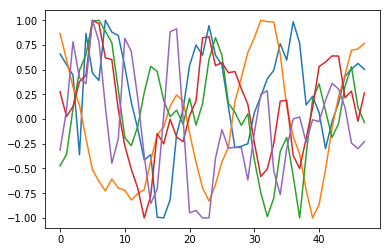

In [12]:
starwars.plot_some_data(nd=5)

In [7]:
starwars.train(epochs=200)

Epoch: 0 D loss: 0.756144642829895 G loss: 0.8034701347351074
Epoch: 10 D loss: 0.701799213886261 G loss: 0.7049572467803955
Epoch: 20 D loss: 0.6933658123016357 G loss: 0.6894659996032715
Epoch: 30 D loss: 0.6962752938270569 G loss: 0.6802226305007935
Epoch: 40 D loss: 0.6941698789596558 G loss: 0.6872323751449585
Epoch: 50 D loss: 0.6998506784439087 G loss: 0.6867585182189941
Epoch: 60 D loss: 0.6947143077850342 G loss: 0.7026078701019287
Epoch: 70 D loss: 0.6965962648391724 G loss: 0.6946064829826355
Epoch: 80 D loss: 0.6962728500366211 G loss: 0.6901738047599792
Epoch: 90 D loss: 0.6873388290405273 G loss: 0.6907520890235901
Epoch: 100 D loss: 0.6926959753036499 G loss: 0.6921249628067017
Epoch: 110 D loss: 0.6969670057296753 G loss: 0.6910355091094971
Epoch: 120 D loss: 0.695406436920166 G loss: 0.6954444646835327
Epoch: 130 D loss: 0.6940636038780212 G loss: 0.691860020160675
Epoch: 140 D loss: 0.6944482922554016 G loss: 0.6949164867401123
Epoch: 150 D loss: 0.6886720657348633 G 

Fake images shape : (1, 48)


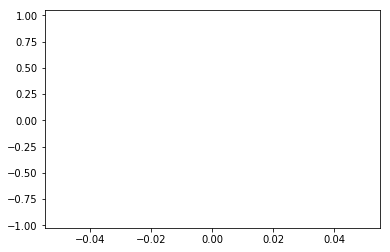

In [8]:
starwars.make_img()
plt.show()

Fake images shape : (5, 48)


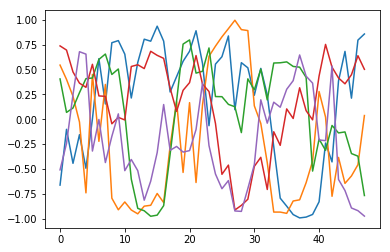

In [11]:
nd = 5
noise = starwars.noise(nd)
fake_images = starwars.gen_model.predict(noise)
print(f'Fake images shape : {fake_images.shape}')
fig, ax = plt.subplots()
ax.plot(fake_images.T)

In [ ]:
# 